In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
import plotly.express as px
import nbformat

In [2]:
data = pd.read_excel('../data/The history of global natural gas production.xlsx',sheet_name = 1)

In [3]:
data = data.melt(id_vars=['Year'],var_name='country',value_name='gas' )

In [4]:
data.to_csv('../data/tidy_gas.csv')

In [5]:
data = pd.read_csv('../data/tidy_gas.csv',index_col=0)
country_border = gpd.read_file('../data/countries.geojson')

In [6]:
country_border = country_border.rename(columns={'ADMIN':'country'})

In [7]:
data_with_border = data.merge(country_border,how='left',on='country')

In [8]:
data_with_border[data_with_border['ISO_A2'].isna()]['country'].unique()

array(['United States', 'Congo', "Cote d'Ivoire", 'Czechia',
       'Czechoslovakia', 'Serbia', 'Tanzania', 'USSR', 'World',
       'Yugoslavia'], dtype=object)

In [9]:
found = []
not_found=[]
for j in data_with_border[data_with_border['ISO_A2'].isna()]['country'].unique():
    find = 0
    print('searching for any country name containing {}…………\n'.format(j))
    for i in country_border['country'].unique():
        if j in i :
            print('yes there is {}\n'.format(i))
            find = 1
            found.append((i,j))
    if find == 0:
        print('no there is  no {}\n'.format(j))
        not_found.append(j)
print('countries below are not found')
print(not_found)

searching for any country name containing United States…………

yes there is United States Minor Outlying Islands

yes there is United States of America

yes there is United States Virgin Islands

searching for any country name containing Congo…………

yes there is Democratic Republic of the Congo

yes there is Republic of Congo

searching for any country name containing Cote d'Ivoire…………

no there is  no Cote d'Ivoire

searching for any country name containing Czechia…………

no there is  no Czechia

searching for any country name containing Czechoslovakia…………

no there is  no Czechoslovakia

searching for any country name containing Serbia…………

yes there is Republic of Serbia

searching for any country name containing Tanzania…………

yes there is United Republic of Tanzania

searching for any country name containing USSR…………

no there is  no USSR

searching for any country name containing World…………

no there is  no World

searching for any country name containing Yugoslavia…………

no there is  no

In [11]:
correct_indice = [1,4,5,6]
found = [found[i]for i in correct_indice]

In [14]:
for i,j in found:
    data_with_border.loc[data_with_border['country'] == j,['ISO_A3','ISO_A2','geometry']] = country_border[country_border['country'] ==i ][['ISO_A3','ISO_A2','geometry']].values

In [15]:
data_with_border[data_with_border['ISO_A2'].isna()]['country'].unique()

array(["Cote d'Ivoire", 'Czechia', 'Czechoslovakia', 'USSR', 'World',
       'Yugoslavia'], dtype=object)

In [16]:
data_with_border_no_border = data_with_border[data_with_border['ISO_A2'].isna()]
data_with_border = data_with_border[~data_with_border['ISO_A2'].isna()]

In [17]:
#转化为geopandas数据格式
data_with_border = gpd.GeoDataFrame(data_with_border,geometry='geometry')

In [18]:
#以下数据转化时间太久，跑了十分钟都没跑出来，中间中断后发现未完成的文件就有1.74GB。
#这就不存储为文件了，改为每次运行时做以上数据清洗。
#data_with_border.to_file('../data/tidy_data_with_border.geojson',driver="GeoJSON")

In [22]:
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [23]:
data_with_border = data_with_border[data_with_border['gas'].apply(is_float)]

In [24]:
data_with_border['gas'] = data_with_border['gas'].astype(float)

In [25]:

select_ISO_A3='CAN'


In [26]:
plot_data = data_with_border[data_with_border['ISO_A3'] == select_ISO_A3]

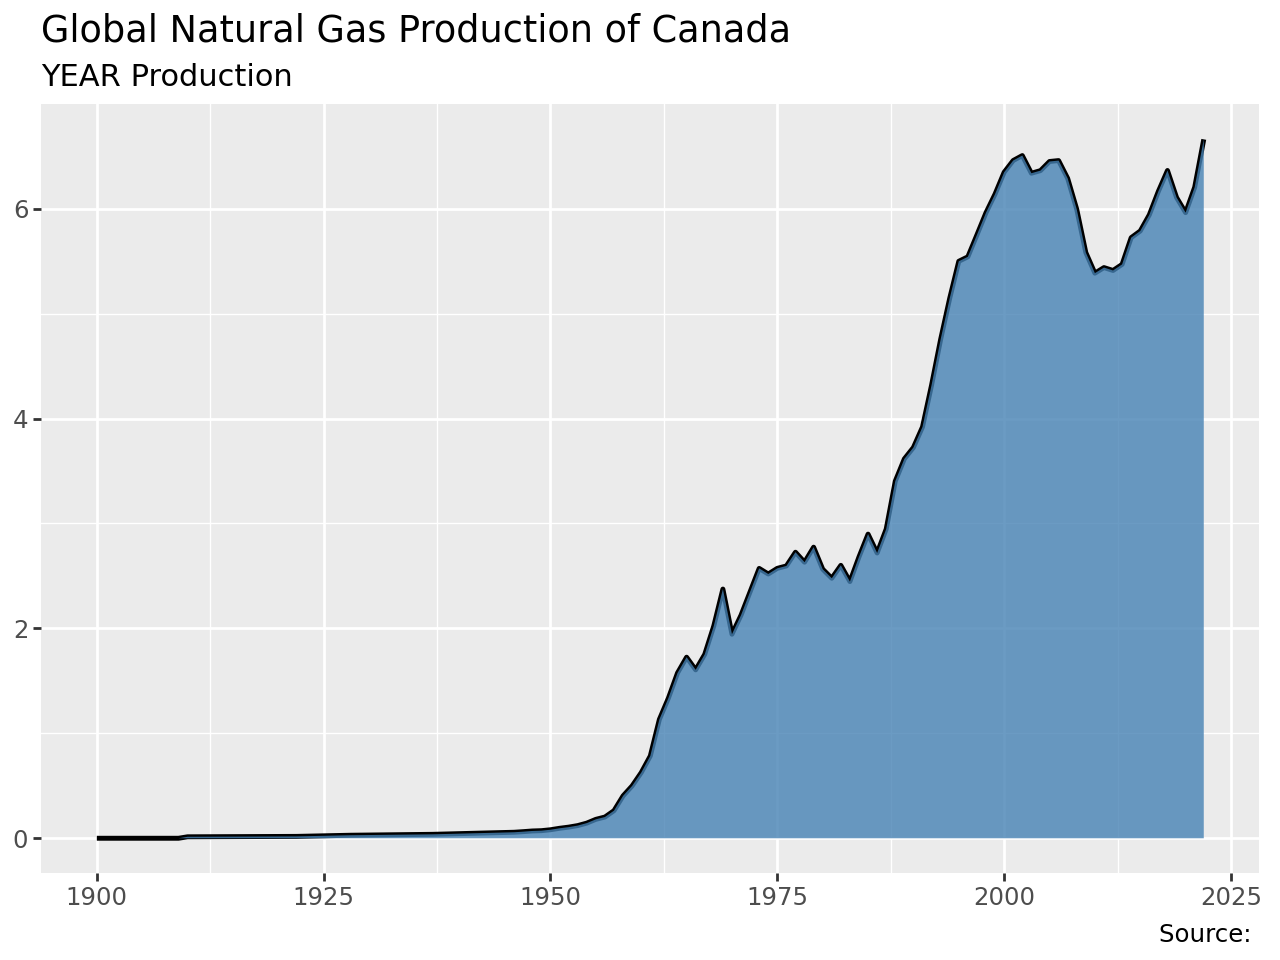

In [27]:
#画图
(ggplot(plot_data,aes(x='Year',y='gas'))+geom_line(size=1)+
 geom_area(fill = "steelblue", alpha = 0.8)+
 labs(title = "Global Natural Gas Production of {}".format(plot_data['country'].unique()[0]), x = "", y = "",
subtitle = "YEAR Production ",
caption = "Source: "))

In [28]:
select_year = 2012
plot_data = data_with_border[data_with_border['Year'] == select_year]

In [ ]:
#全球地理图，对应原网站图一
fig = px.choropleth_mapbox(
    geojson = plot_data, data_frame = plot_data, color = "gas",
    featureidkey="properties.country",
    locations = "country",
    mapbox_style = "carto-positron",zoom = 1,
    color_continuous_scale = 'blues',
    title = "world gas production by countries")

In [54]:
fig.write_html('world_gas_production_map.html')